# Mnist CNN
  **Parham Nayeri**

  **apadana**

  **Ostad Zare**

train model baraye solve MNIST
  
  _Libray haye morde niyaz_
      
      NumPy
      Tensorflow ------> train va sakhte Model
      Tensorflow_datasets ----> baraye load MNIST
      matplotlab -----> baraye Namayesh Image  

# Import Libraris


In [22]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

# Import MNIST

In [23]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

# Normalize Function

ma dar in function tasavir ro az image be float tabdil karde va anhara taqsim bar 255 mikonim ta [0,1] be dast ayad

In [24]:
def normalize_img(image, label):

  return tf.cast(image, tf.float32) / 255., label


# Normalize DataSets

In [25]:
ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

# Sakht Model

ma baraye sakhte model az 2 hidden layer va 1 outputlayer estefade kardim

***LAYER 1 : Flatten***

baraye tabdil 2D array be 1D az in model layer estefade mikonim estefade az in layer dar keras be onvane layer aval baraye array 2D ejbari ast

***LAYER 2-3 : ReLU***

dar layer 2 va 3 mn az activation function ReLU estefade kardam baraye inke adade mannfi be 0 taqir konand . dar layer 2 az 128 unit va dar layer 3 az 50 unit estefade kardam

***OUTPUT LAYER : SOFTMAX***

dar laye output ma az softmax baraye mutliclass clasification estefade kardim ke be tool tedad adade yani (0 ta 9) ast

In [28]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(50,activation='relu'),
  tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)


Epoch 1/6
469/469 [==============================] - 7s 11ms/step - loss: 0.3552 - sparse_categorical_accuracy: 0.8966 - val_loss: 0.1690 - val_sparse_categorical_accuracy: 0.9490
Epoch 2/6
469/469 [==============================] - 3s 6ms/step - loss: 0.1421 - sparse_categorical_accuracy: 0.9587 - val_loss: 0.1196 - val_sparse_categorical_accuracy: 0.9653
Epoch 3/6
469/469 [==============================] - 3s 6ms/step - loss: 0.1007 - sparse_categorical_accuracy: 0.9706 - val_loss: 0.1013 - val_sparse_categorical_accuracy: 0.9695
Epoch 4/6
469/469 [==============================] - 5s 9ms/step - loss: 0.0755 - sparse_categorical_accuracy: 0.9773 - val_loss: 0.0930 - val_sparse_categorical_accuracy: 0.9710
Epoch 5/6
469/469 [==============================] - 3s 6ms/step - loss: 0.0603 - sparse_categorical_accuracy: 0.9822 - val_loss: 0.0854 - val_sparse_categorical_accuracy: 0.9736
Epoch 6/6
469/469 [==============================] - 3s 7ms/step - loss: 0.0489 - sparse_categorical_acc

# Test Model Va Namayesh dade ha

dar inja az plt baraye tabdil array 2D be image estefade mikonim

79/79 [==============================] - 0s 3ms/step


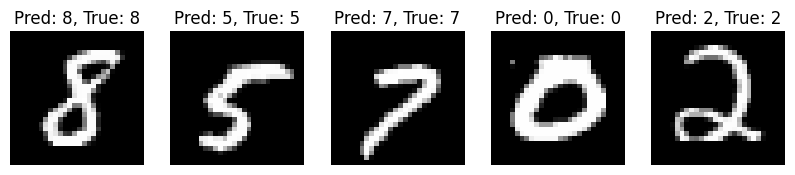

In [29]:
predictions = model.predict(ds_test)
test_images = np.concatenate([x for x, y in ds_test], axis=0)
test_labels = np.concatenate([y for x, y in ds_test], axis=0)
predicted_labels = np.argmax(predictions, axis=1)
num_images_to_display = 5
random_indices = np.random.choice(test_images.shape[0], num_images_to_display, replace=False)
images_to_display = test_images[random_indices]
predictions_to_display = predicted_labels[random_indices]
labels_to_display = test_labels[random_indices]
plt.figure(figsize=(10, 5))
for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(images_to_display[i], cmap='gray')
    plt.title(f"Pred: {predictions_to_display[i]}, True: {labels_to_display[i]}")
    plt.axis('off')
plt.show()